In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
folder = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\StarDist Segmentation Models"
df = pd.read_csv(os.path.join(folder, "retraining_bad.csv"))
df

,Start,Tissue,LR,Epochs,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality
0,SD_HE_20x,FallopianTube,0.00001,0,0.5,1078,243,630,0.816048,0.631148,0.711786,0.520846
1,SD_HE_20x,FallopianTube,0.00001,1,0.5,1217,265,491,0.821188,0.712529,0.763009,0.553450
2,SD_HE_20x,FallopianTube,0.00001,2,0.5,1238,261,470,0.825884,0.724824,0.772061,0.566065
3,SD_HE_20x,FallopianTube,0.00001,3,0.5,1238,261,470,0.825884,0.724824,0.772061,0.566065
4,SD_HE_20x,FallopianTube,0.00001,4,0.5,1261,275,447,0.820964,0.738290,0.777435,0.570466
...,...,...,...,...,...,...,...,...,...,...,...,...
202,Random,Skin,0.00030,90,0.5,1079,286,456,0.790476,0.702932,0.744138,0.536751
203,Random,Skin,0.00030,100,0.5,1079,286,456,0.790476,0.702932,0.744138,0.536751
204,Random,Skin,0.00030,150,0.5,1079,286,456,0.790476,0.702932,0.744138,0.536751
205,Random,Skin,0.00030,200,0.5,1079,286,456,0.790476,0.702932,0.744138,0.536751


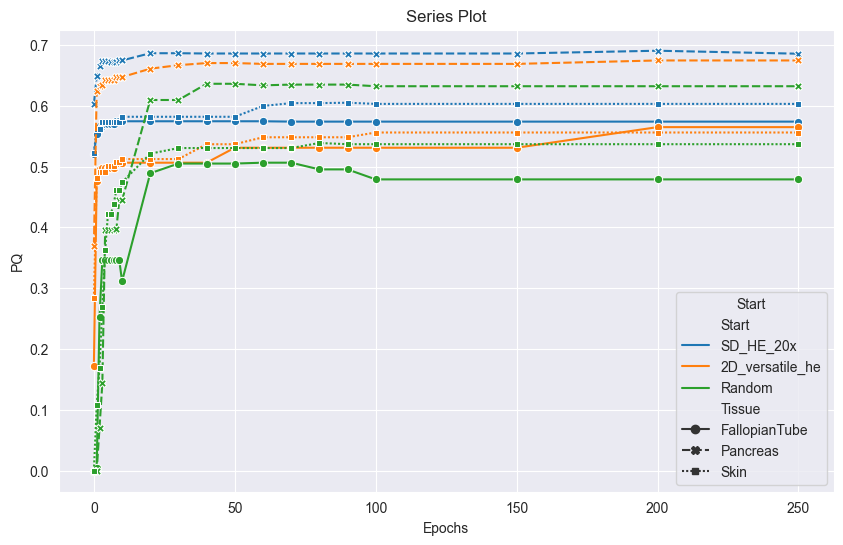

In [4]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epochs', y='Panoptic Quality', hue='Start', style='Tissue', markers=True)
plt.title('Series Plot')
plt.xlabel('Epochs')
plt.ylabel('PQ')
plt.legend(title='Start')
plt.show()

C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


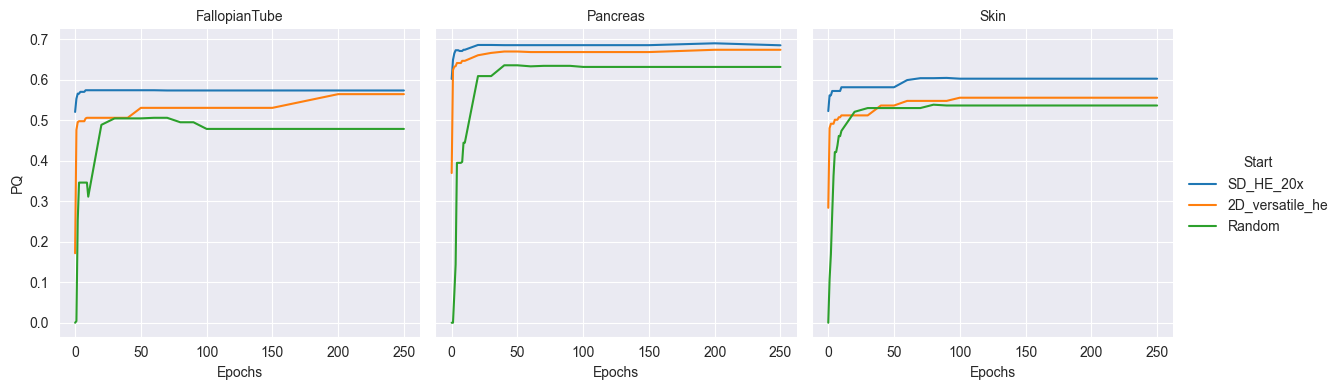

In [5]:
g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4)
g.map(sns.lineplot, "Epochs", "Panoptic Quality")
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "PQ")
g.add_legend(title="Start")
plt.show()

C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


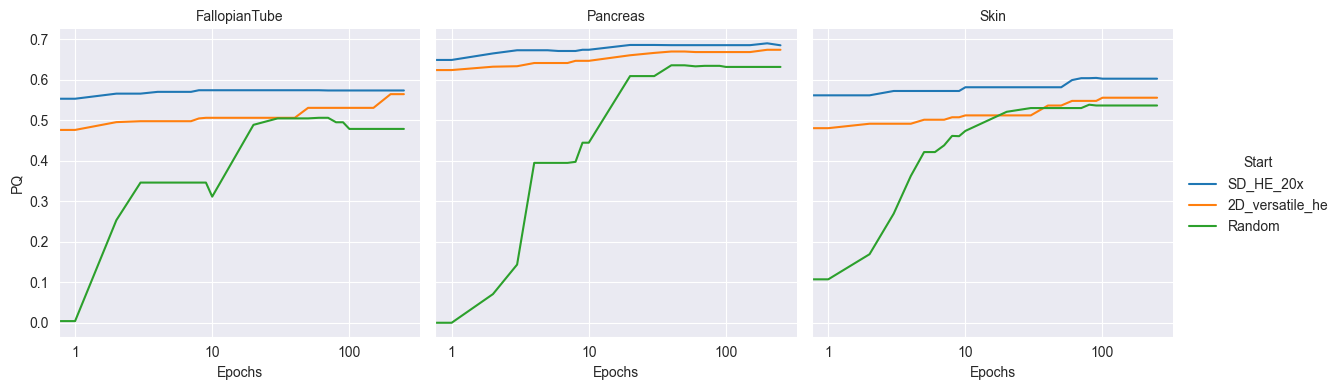

In [6]:
g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4)
g.map(sns.lineplot, "Epochs", "Panoptic Quality")
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "PQ")

# Set x-axis to log scale with log10 x-tick spacing
for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:g}'.format(x)))

g.add_legend(title="Start")
plt.show()

C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


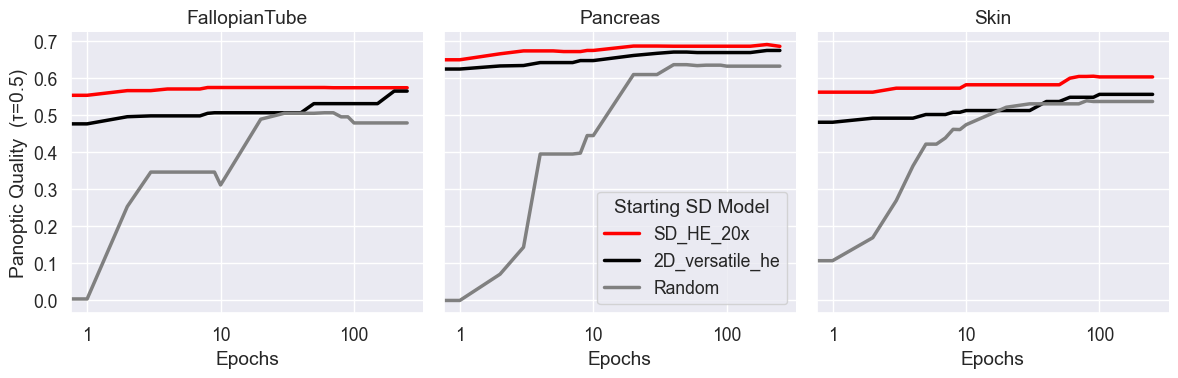

In [34]:
sns.set_style("darkgrid")
sns.set(font_scale=1.15)
custom_palette = {'SD_HE_20x': 'red', '2D_versatile_he': 'black', 'Random': 'gray'}

g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4, palette=custom_palette)
g.map(sns.lineplot, "Epochs", "Panoptic Quality", linewidth=2.5)
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "Panoptic Quality  (τ=0.5)")
for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:g}'.format(x)))
g.axes[1].legend(title="Starting SD Model", bbox_to_anchor=(1, 0.0), loc='lower right')
plt.savefig(os.path.join(folder, 'retrain_charts.png'), bbox_inches='tight', dpi=100)
plt.show()